In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()



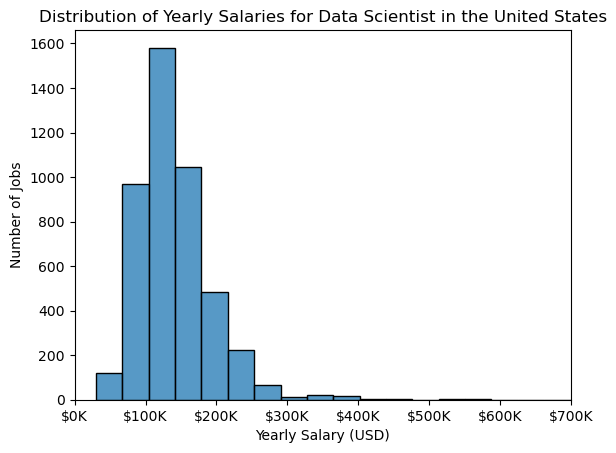

In [32]:
sns.histplot(df_ds_us['salary_year_avg'], bins=25, kde=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlim(0,700000)

# Axis & graph titles:
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.show()